In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd

rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit

In [2]:
Prop = xlrd.open_workbook('Gd-Y.xlsx')
SpecHeat = Prop.sheet_by_name('C')
dTad = Prop.sheet_by_name('dT')

In [3]:
T_exp = dTad.col_values(0)
B_exp = dTad.col_values(1)

K = len(dTad.col_values(0))

dT = zeros([4,K])
C = zeros([4,K])
for i in range(4):
    dT[i,:] = (dTad.col_values(i+2))
    C[i,:] = (SpecHeat.col_values(i+2))

In [4]:
def Properties(SpecHeat,dTad,B_l_int,B_h_int):
    T_exp = dTad.col_values(0)
    B_exp = dTad.col_values(1)

    K = len(dTad.col_values(0))

    dT = zeros([4,K])
    C = zeros([4,K])
    for i in range(4):
        dT[i,:] = (dTad.col_values(i+2))
        C[i,:] = (SpecHeat.col_values(i+2))

    C_d = ([],[],[],[])
    C_m = ([],[],[],[])
    dT_d = ([],[],[],[])
    dT_m = ([],[],[],[])
    dT_ad = ([],[],[],[])

    for i in range(K):
        if B_exp[i] == B_l_int:
            for j in range(4):
                C_d[j].append(C[j,i])
                dT_d[j].append(dT[j,i])       

        if B_exp[i] == B_h_int:
            for j in range(4):
                C_m[j].append(C[j,i])
                dT_m[j].append(dT[j,i])
                
                
                
    
                
                
            
    return(C_m,C_d,dT_m,dT_d)

In [5]:
(C_m,C_d,dT_m,dT_d) = Properties(SpecHeat,dTad,0.33,1.14)
T = arange(min(T_exp),max(T_exp)+0.01,0.1)

dT_ad = np.array(dT_m)-np.array(dT_d)
T_dem = zeros([4,len(T)])

for j in range(4):
    T_dem[j] = T + dT_ad[j] 

In [13]:
def Cdt(T_m,L_m,Th,Tc,T,T_dem,C_m,C_d,dT_ad):
    
    C_mag = []
    C_dmag = []
    dT_mag = []
    dT_dmag = []
    T_t = []
    T_int = []
    
    N_l = len(T_m)
    a = zeros(N_l)
    
    L = 0
    for i in range(N_l):
        L = L + L_m[i]
        T_tr = Tc + L/100*(Th-Tc)
        T_t.append(T_tr)
        
    
    for i in range(N_l):
        if T_m[i] == 273:
            a[i] = 3
        elif T_m[i] == 277:
            a[i] = 2
        elif T_m [i] == 283:
            a[i] = 1

    dT_ad_d = zeros([4,len(T)])
    
    for k in range(4):
        for i in range(len(T)):
            for j in range(len(T_dem[k])):
                #print(k,i,j)
                if T_dem[k][j] > T[i] and T_dem[k][j-1] < T[i]:
                    dT_ad_d[k][i] = dT_ad[k][j-1] + (T[i]-T_dem[k][j-1])/(T_dem[k][j]- T_dem[k][i])*(dT_ad[k][j]-dT_ad[k][j-1])
                    
    for j in range(N_l):
        for i in range(len(T)): 
            #print(Tc,T[i])
            if T[i] > Tc-0.01 and T[i] < T_t[j]:
                C_mag.append(C_m[int(a[j])][i])
                C_dmag.append(C_d[int(a[j])][i])
                dT_mag.append(dT_ad[int(a[j])][i])
                dT_dmag.append(dT_ad_d[int(a[j])][i])
                T_int.append(T[i])
                if T[i+1] > T_t[j]:
                    Tc = T_t[j]
                          
    return(C_mag,C_dmag,dT_mag,dT_dmag,T_int,dT_ad_d)

In [14]:
(C_mag,C_dmag,dT_mag,dT_dmag,T_int,dT_ad_d) = Cdt([273,300],[50,50],300,270,T,T_dem,C_m,C_d,dT_ad)

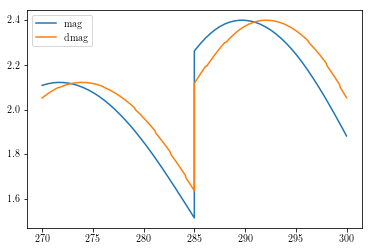

In [15]:
plt.plot(T_int,dT_mag,label = 'mag')
plt.plot(T_int,dT_dmag, label = 'dmag')
plt.legend()
plt.show()